# DS 201 Final Project
by Matthew Passante, Rachel Vartanian, Sabina Lehnert, Michael Feldman



In [ ]:
#Install packages to run and input data

!pip install ucimlrepo
!pip install statsmodels
import statsmodels.api as sm

In [ ]:
from ucimlrepo import fetch_ucirepo

#Take the dataset from the UCI database
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)


X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

#Check the metadata
print(cdc_diabetes_health_indicators.metadata)

#Check the variables
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
#Add pandas to analyze the data

import pandas as pd
df = pd.concat([X, y], axis=1)
print(df.shape)
df.head()


(253680, 22)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [ ]:
#Basic exploration

#Check column types
df.info()
#Descriptive statistics
df.describe()
#Check what's missing
df.isna().sum()
#Pull column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [ ]:
#Import matplotlib
import matplotlib.pyplot as plt


#Start on analysis, create axes
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets
df = pd.concat([X, y], axis=1)

#Change the names for better cohesion
cols = ["GenHlth", "MentHlth", "PhysHlth", "BMI"]
health_df = df[cols].copy()
health_df.head()

,GenHlth,MentHlth,PhysHlth,BMI
0,5,18,15,40
1,3,0,0,25
2,5,30,30,28
3,2,0,0,27
4,2,3,0,24


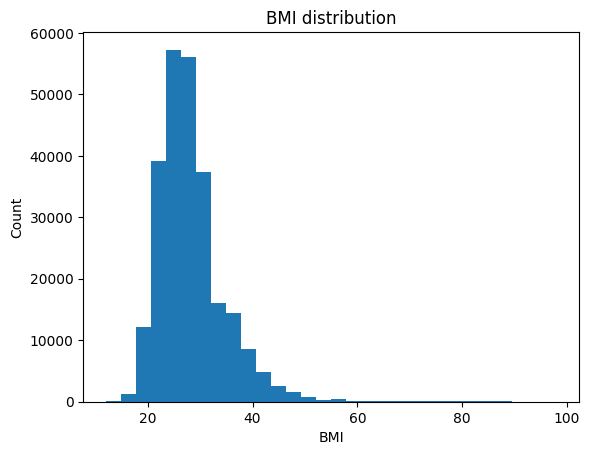

In [ ]:
#Run the actual BMI distribution

health_df["BMI"].describe().round(3)
plt.hist(health_df["BMI"], bins=30)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI distribution")
plt.show()



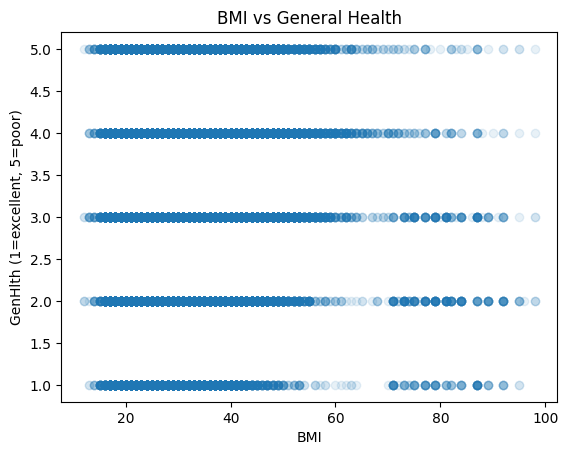

In [ ]:
#Distribute BMI with General Health statistics

health_df[["BMI", "GenHlth", "MentHlth", "PhysHlth"]].corr().round(3)
plt.scatter(health_df["BMI"], health_df["GenHlth"], alpha=0.1)
plt.xlabel("BMI")
plt.ylabel("GenHlth (1=excellent, 5=poor)")
plt.title("BMI vs General Health")
plt.show()



In [ ]:
#Begin on regressions and actual decision tree models

def run_simple_regression(df, y_col, x_col="BMI"):
    y = df[y_col]
    X = df[[x_col]]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(f"\n===== Regression of {y_col} on {x_col} (BMI <= 39.9) =====")
    print(model.summary())
    return model

In [ ]:
import statsmodels.api as sm
#Drop extremely high BMI (40+ also known as class 3 obesesity) people for statistics
health_df_cut = health_df[health_df["BMI"] <= 39.9].copy()

print(health_df.shape, "before")
print(health_df_cut.shape, "after")

health_df_cut["BMI"].describe().round(3)


(253680, 4) before
(239943, 4) after


,BMI
count,239943.000
mean,27.358
std,4.725
min,12.000
25%,24.000
50%,27.000
75%,30.000
max,39.000


# Machine Learning Model

In [ ]:
cols = ["GenHlth", "MentHlth", "PhysHlth", "BMI"]
health_df = df[cols].copy()

#Create a target characteristic of are they obese or not
health_df["obese"] = (health_df["BMI"] >= 30).astype(int)

health_df["obese"].value_counts(normalize=True).round(3)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Set X and Y
X = health_df[["GenHlth", "MentHlth", "PhysHlth"]]
y = health_df["obese"]

#Start training and testing our model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Pick the most simple one
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Test
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 3))

print(classification_report(y_test, y_pred))


Accuracy: 0.651
              precision    recall  f1-score   support

           0       0.67      0.91      0.77     33166
           1       0.49      0.16      0.25     17570

    accuracy                           0.65     50736
   macro avg       0.58      0.54      0.51     50736
weighted avg       0.61      0.65      0.59     50736



In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Make predictions on 20 percent of the data.
y_pred = log_reg.predict(X_test)

#Check how it compares to the real labels of the data we were given
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 3))
print(classification_report(y_test, y_pred))


Accuracy: 0.651
              precision    recall  f1-score   support

           0       0.67      0.91      0.77     33166
           1       0.49      0.16      0.25     17570

    accuracy                           0.65     50736
   macro avg       0.58      0.54      0.51     50736
weighted avg       0.61      0.65      0.59     50736



In [ ]:
print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

print("\nClass balance in full data:")
print(y.value_counts(normalize=True))

print("\nClass balance in TRAIN:")
print(y_train.value_counts(normalize=True))

print("\nClass balance in TEST:")
print(y_test.value_counts(normalize=True))


Shapes:
X_train: (202944, 3)
X_test: (50736, 3)

Class balance in full data:
obese
0    0.653694
1    0.346306
Name: proportion, dtype: float64

Class balance in TRAIN:
obese
0    0.653693
1    0.346307
Name: proportion, dtype: float64

Class balance in TEST:
obese
0    0.653698
1    0.346302
Name: proportion, dtype: float64


In [ ]:
# Dummy variable, 1 if BMI is greater or equal to 40, otherwise 0
health_df["BMI_40plus"] = (health_df["BMI"] >= 40).astype(int)

#How many are over 40
health_df["BMI_40plus"].value_counts(normalize=True)

health_df.groupby("BMI_40plus")["MentHlth"].mean()

,MentHlth
BMI_40plus,
0,3.039555
1,5.721264


In [ ]:
health_df["poor_mental"] = (health_df["MentHlth"] >= 10).astype(int)

health_df["poor_mental"].value_counts(normalize=True)



,proportion
poor_mental,
0,0.876261
1,0.123739


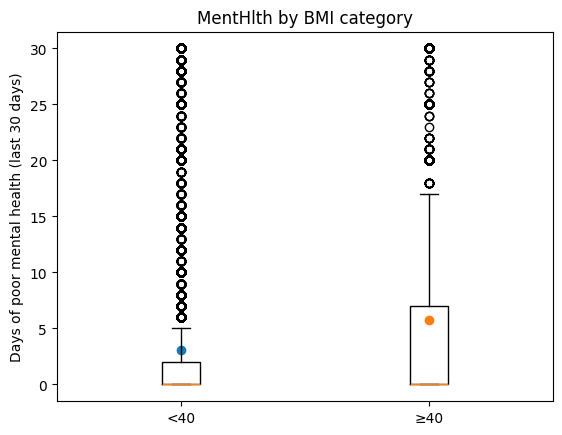

In [ ]:
#Use decision tree to predict mental health from general, physical and BMI
means = health_df.groupby("BMI_40plus")["MentHlth"].mean()
plt.boxplot([health_df.loc[health_df["BMI_40plus"]==0, "MentHlth"],
             health_df.loc[health_df["BMI_40plus"]==1, "MentHlth"]])
plt.xticks([1, 2], ["<40", "≥40"])
plt.ylabel("Days of poor mental health (last 30 days)")
plt.title("MentHlth by BMI category")
for i, m in enumerate(means, start=1):
    plt.scatter(i, m)
plt.show()


In [ ]:
#Build frequency table for BMI and mental health
pd.crosstab(health_df["BMI_40plus"], health_df["poor_mental"],
            normalize="index")


poor_mental,0,1
BMI_40plus,,
0,0.882443,0.117557
1,0.768290,0.231710


In [ ]:
#Look at risk factors in mental, physical, and general health
health_df["flag_gen_bad"]  = (health_df["GenHlth"] >= 4).astype(int)
health_df["flag_phys_bad"] = (health_df["PhysHlth"] >= 10).astype(int)
health_df["BMI_40plus"]    = (health_df["BMI"] >= 40).astype(int)

#Test
print(health_df[["flag_gen_bad", "flag_phys_bad", "BMI_40plus", "poor_mental"]].head())


   flag_gen_bad  flag_phys_bad  BMI_40plus  poor_mental
0             1              1           1            1
1             0              0           0            0
2             1              1           0            1
3             0              0           0            0
4             0              0           0            0


In [ ]:
import numpy as np

conditions = [
    (health_df["MentHlth"] <= 3),
    (health_df["MentHlth"] > 3) & (health_df["MentHlth"] <= 9),
    (health_df["MentHlth"] >= 10)
]
choices = ["good", "moderate", "poor"]

health_df["mental_cat"] = np.select(conditions, choices, default="good")

print(health_df["mental_cat"].value_counts(normalize=True).round(3))


mental_cat
good        0.807
poor        0.124
moderate    0.070
Name: proportion, dtype: float64


Accuracy: 0.78


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        good       0.86      0.90      0.88     40931
    moderate       0.00      0.00      0.00      3527
        poor       0.37      0.46      0.41      6278

    accuracy                           0.78     50736
   macro avg       0.41      0.45      0.43     50736
weighted avg       0.74      0.78      0.76     50736



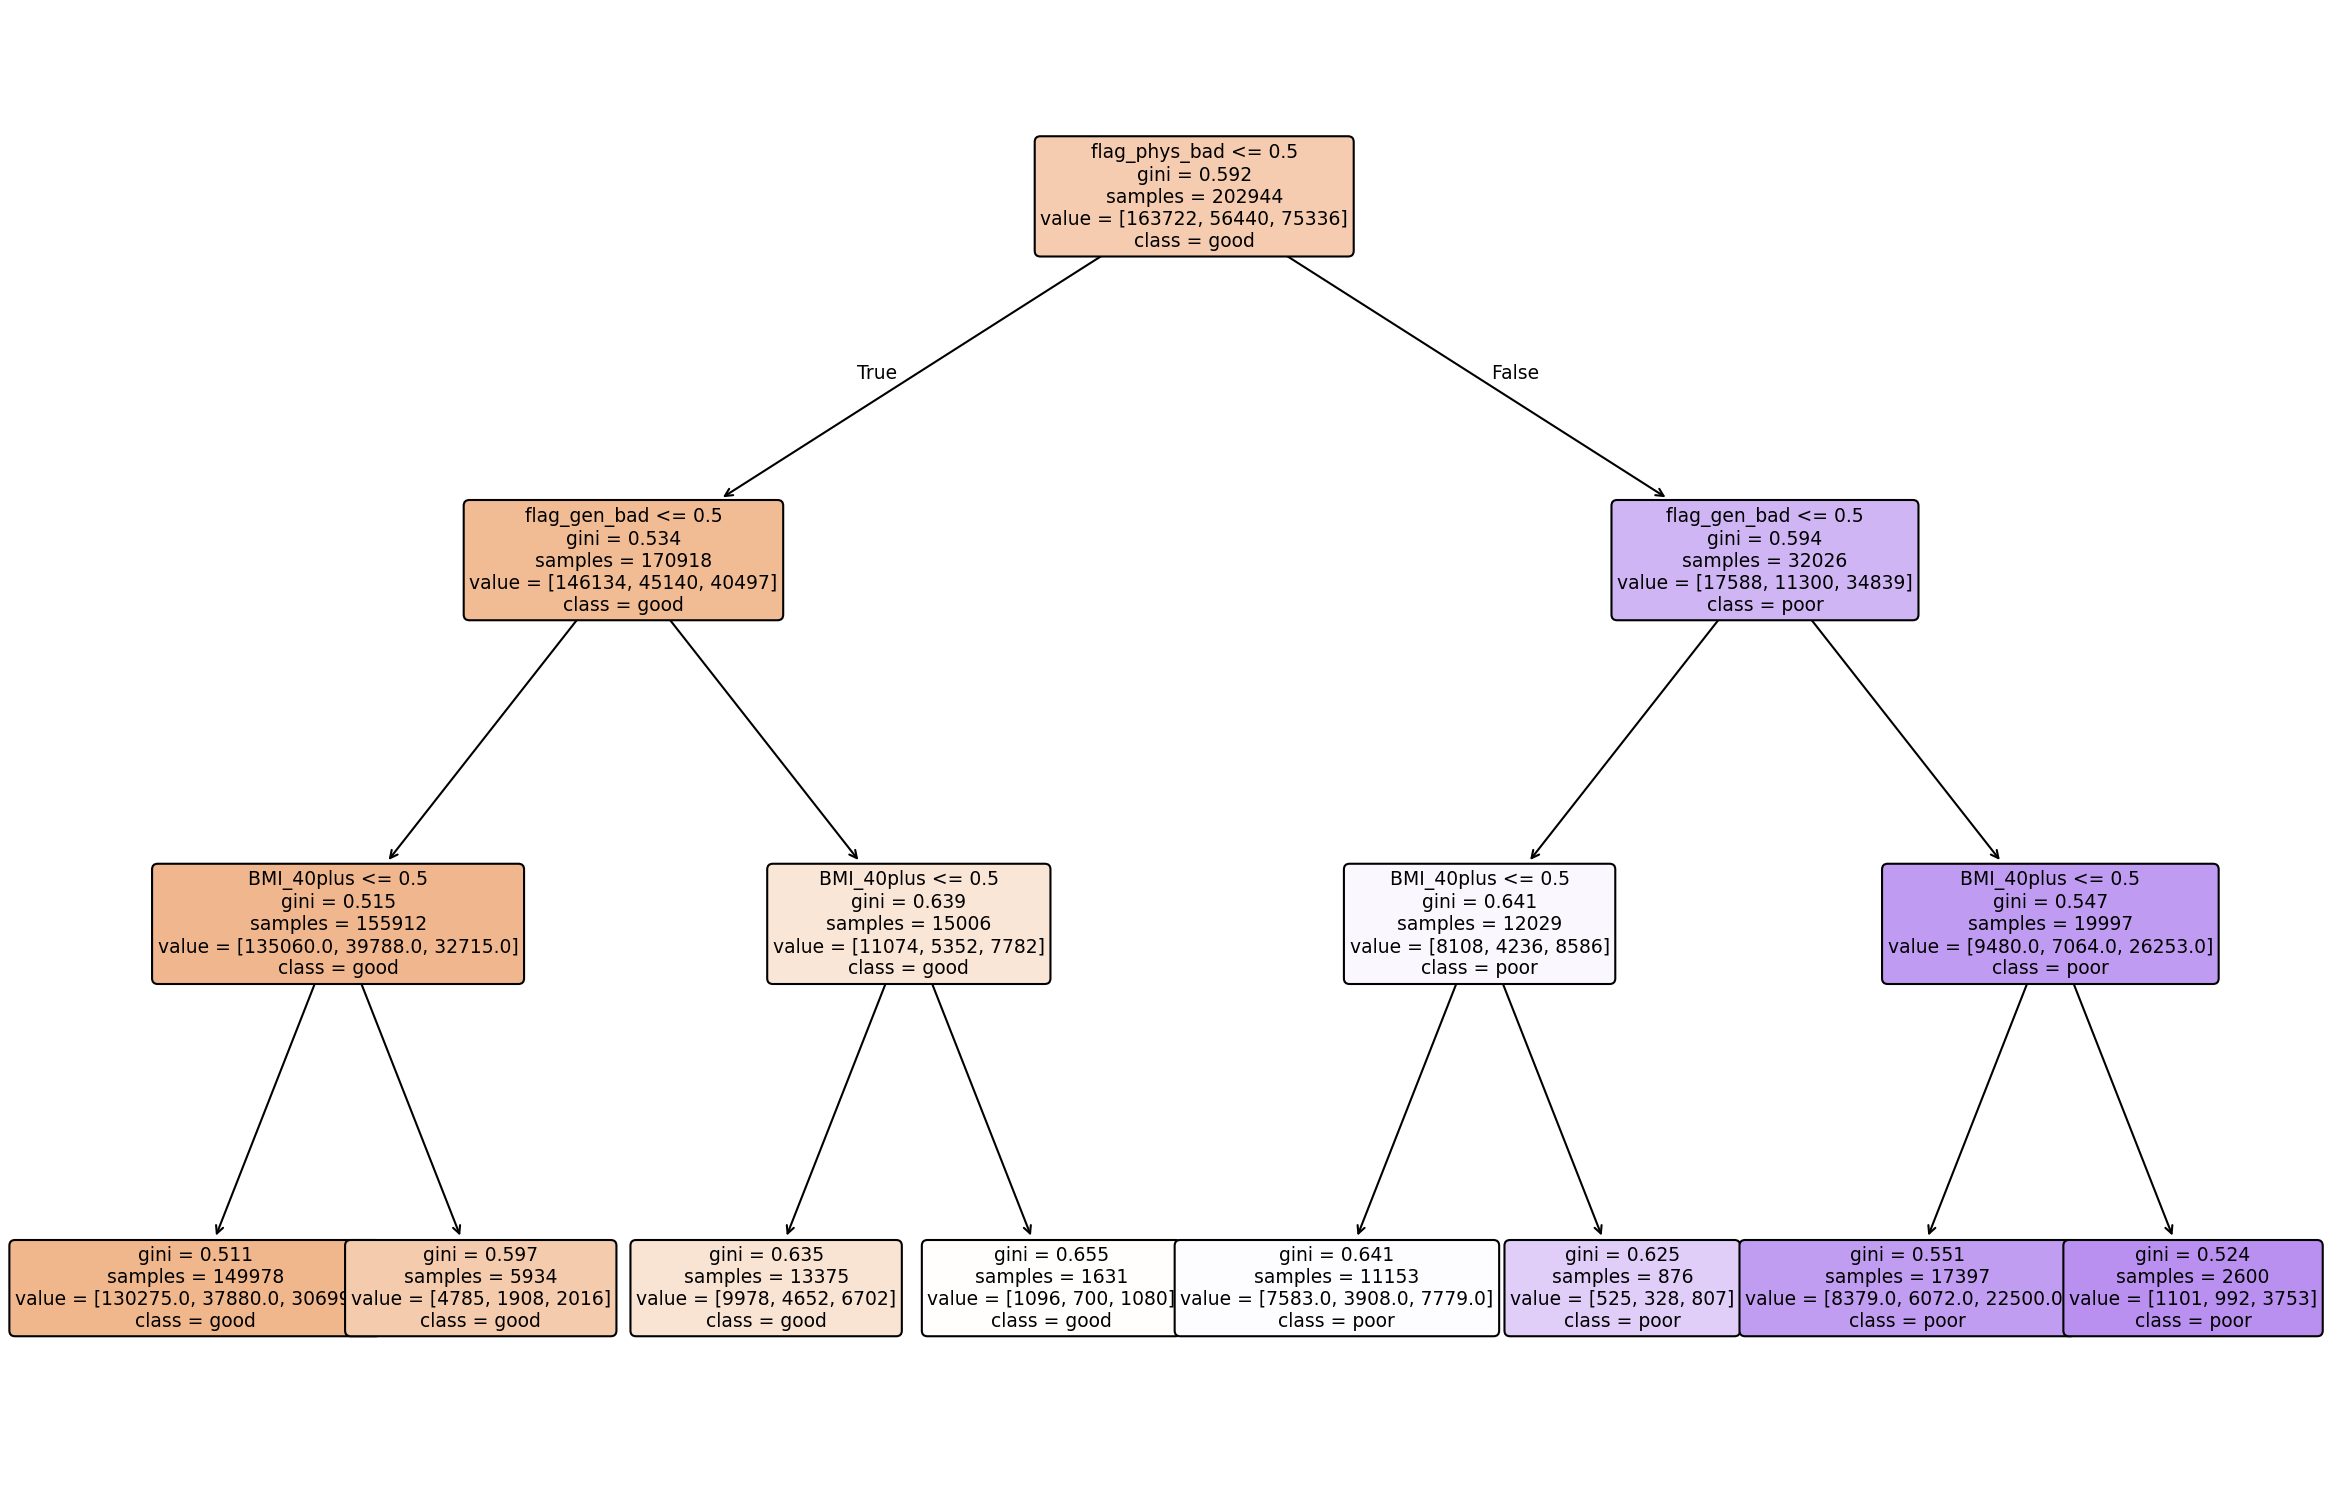

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Use risk factors when looking at 3-level mental health
X_flags = health_df[["flag_gen_bad", "flag_phys_bad", "BMI_40plus"]]
y_flags = health_df["mental_cat"]

X_train, X_test, y_train, y_test = train_test_split(
    X_flags, y_flags,
    test_size=0.2,
    random_state=42,
    stratify=y_flags
)

# Tree with class weights
tree_flags = DecisionTreeClassifier(
    max_depth=4,
    class_weight={"good": 1, "moderate": 4, "poor": 3},
    random_state=42
)
tree_flags.fit(X_train, y_train)

# Test
y_pred = tree_flags.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))

# Visualisation
plt.figure(figsize=(16, 10), dpi=150) # Had to edit to make this easier to read / higher definition
plot_tree(
    tree_flags,
    feature_names=["flag_gen_bad", "flag_phys_bad", "BMI_40plus"],
    class_names=["good", "moderate", "poor"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.tight_layout()
plt.show()
